<a href="https://colab.research.google.com/github/Hritik8005/Salary-Prediction/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [49]:
data = pd.read_csv(r"/content/Salary Data.csv")

In [50]:
data.shape

(375, 6)

In [51]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [52]:
data.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


In [53]:
data.sample(6)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
111,37.0,Male,Bachelor's,Software Project Manager,9.0,95000.0
242,38.0,Female,Bachelor's,Senior Product Manager,10.0,120000.0
276,46.0,Male,PhD,Senior Data Analyst,17.0,160000.0
25,28.0,Female,Bachelor's,Social Media Specialist,3.0,45000.0
224,28.0,Male,Bachelor's,Junior Financial Analyst,2.0,40000.0


In [54]:
data['Job Title'].nunique()

174

In [55]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

# EDA

In [56]:
# Checking Null values
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [57]:
# Checking the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


 null values present.

 Datatype is ok with respective their column.

In [58]:
# TO remove null values
for i in data.columns:
        if (data[i].dtype=="float"):
            x = data[i].mean()
            data[i] = data[i].fillna(x)
        elif (data[i].dtype == "object"):
            x = data[i].mode()[0]
            data[i] = data[i].fillna(x)
        else:
            x = data[i].mean()
            data[i] = data[i].fillna(x)


In [59]:
# Checking Null values after removing
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [60]:
data.columns = data.columns.str.lower()

# Visualization of the data

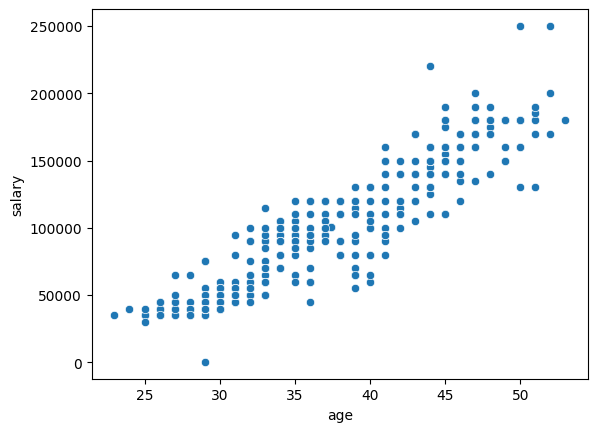

In [61]:
sns.scatterplot(x='age',y='salary',data=data)
plt.show()

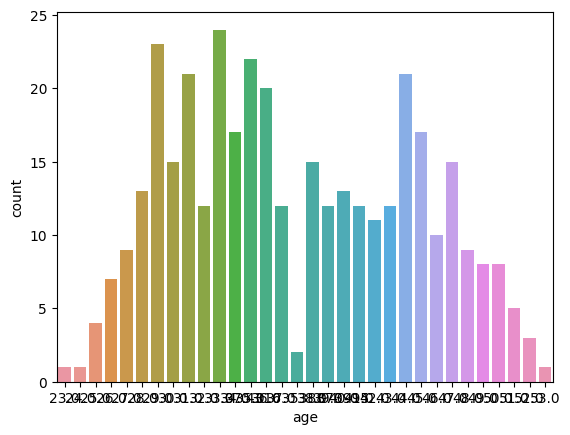

In [62]:
sns.countplot(x='age',data=data)
plt.show()

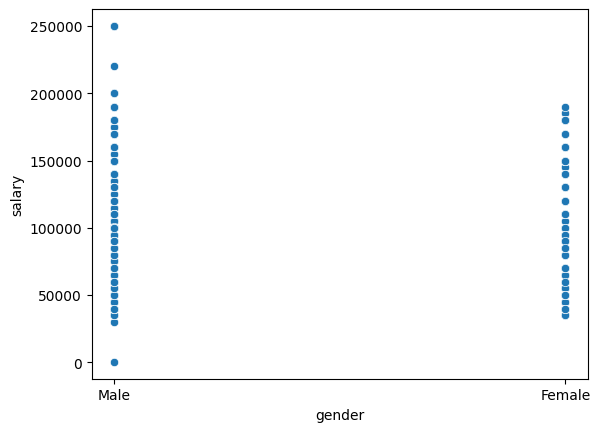

In [63]:
sns.scatterplot(x='gender',y='salary',data=data)
plt.show()

We can see the salary is equally distributed in the range of 65000 to 200000 for both gender

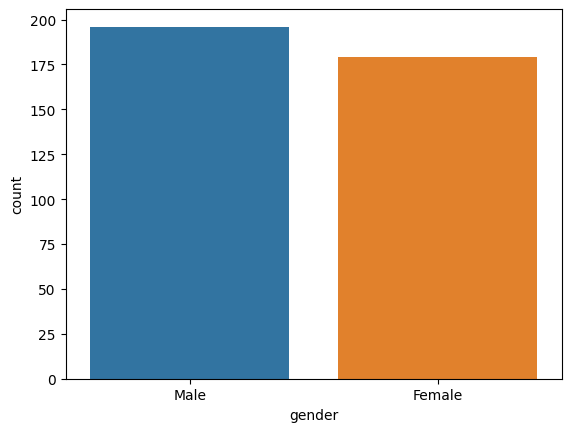

In [64]:
sns.countplot(x='gender',data=data)
plt.show()

Male Gender is equal to Female Gender upto 0 to 175.

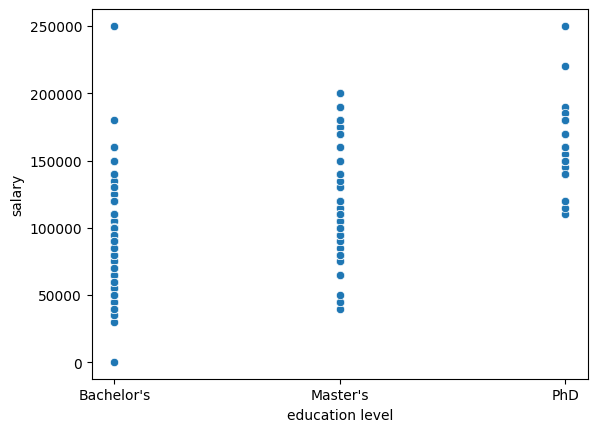

In [65]:
sns.scatterplot(x='education level',y='salary',data=data)
plt.show()

Salary range of PhD is high than other

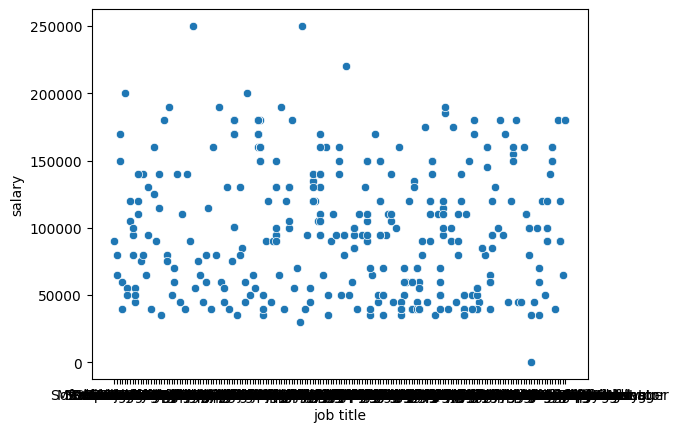

In [66]:
sns.scatterplot(x='job title',y='salary',data=data)
plt.show()

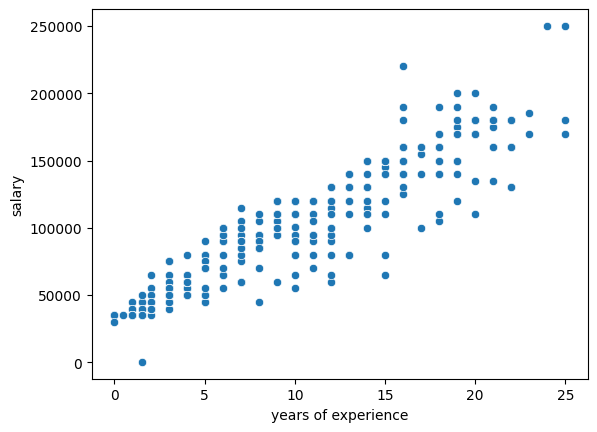

In [67]:
sns.scatterplot(x='years of experience',y='salary',data=data)
plt.show()

Year of experince is increases then salary also increases.

# Checking the distribution of the continuous values

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  375 non-null    float64
 1   gender               375 non-null    object 
 2   education level      375 non-null    object 
 3   job title            375 non-null    object 
 4   years of experience  375 non-null    float64
 5   salary               375 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


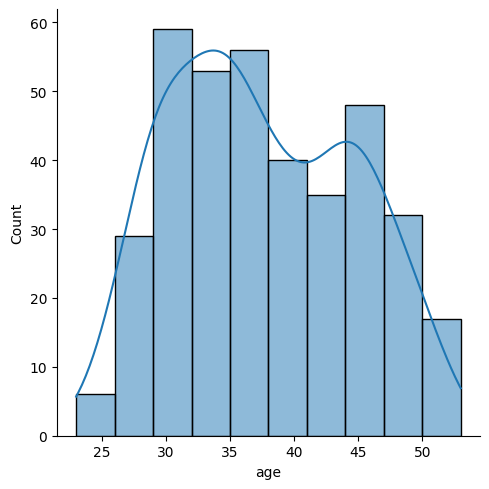

In [69]:
sns.displot(data['age'], kde=True)
plt.show()

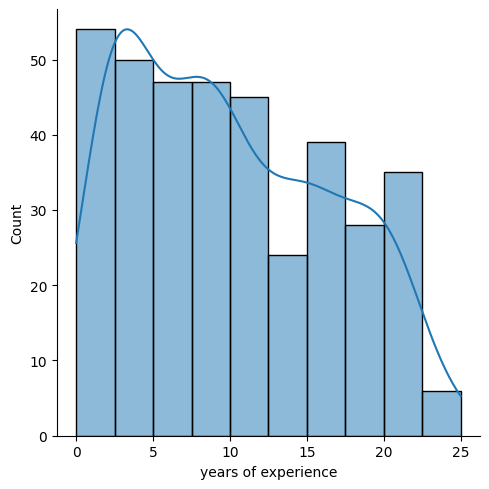

In [70]:
sns.displot(data['years of experience'], kde=True)
plt.show()

# Encoding of DataFrame

In [71]:
df1 = pd.get_dummies(data[['education level','gender']],drop_first=True)
df1

,education level_Master's,education level_PhD,gender_Male
0,0,0,1
1,1,0,0
2,0,1,1
3,0,0,0
4,1,0,1
...,...,...,...
370,0,0,0
371,1,0,1
372,0,0,0
373,0,0,1


In [72]:
data = data.join(df1)
data

,age,gender,education level,job title,years of experience,salary,education level_Master's,education level_PhD,gender_Male
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0,0,1
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,1,0,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,0,1,1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,0
4,52.0,Male,Master's,Director,20.0,200000.0,1,0,1
...,...,...,...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0,0,0,0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0,1,0,1
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0,0,0,0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0,0,0,1


In [73]:
data = data.drop(columns=['education level','gender','job title'],axis=1)
data.head()

,age,years of experience,salary,education level_Master's,education level_PhD,gender_Male
0,32.0,5.0,90000.0,0,0,1
1,28.0,3.0,65000.0,1,0,0
2,45.0,15.0,150000.0,0,1,1
3,36.0,7.0,60000.0,0,0,0
4,52.0,20.0,200000.0,1,0,1


# Correlation of the columns with the target column

In [74]:
data.corr()

,age,years of experience,salary,education level_Master's,education level_PhD,gender_Male
age,1.000000,0.979128,0.922335,0.281629,0.411009,-0.020274
years of experience,0.979128,1.000000,0.930338,0.306670,0.424573,0.002877
salary,0.922335,0.930338,1.000000,0.361717,0.472873,0.070931
education level_Master's,0.281629,0.306670,0.361717,1.000000,-0.235986,-0.039143
education level_PhD,0.411009,0.424573,0.472873,-0.235986,1.000000,-0.025792
gender_Male,-0.020274,0.002877,0.070931,-0.039143,-0.025792,1.000000


In [75]:
data.corr()['salary'].sort_values()

gender_Male                 0.070931
education level_Master's    0.361717
education level_PhD         0.472873
age                         0.922335
years of experience         0.930338
salary                      1.000000
Name: salary, dtype: float64

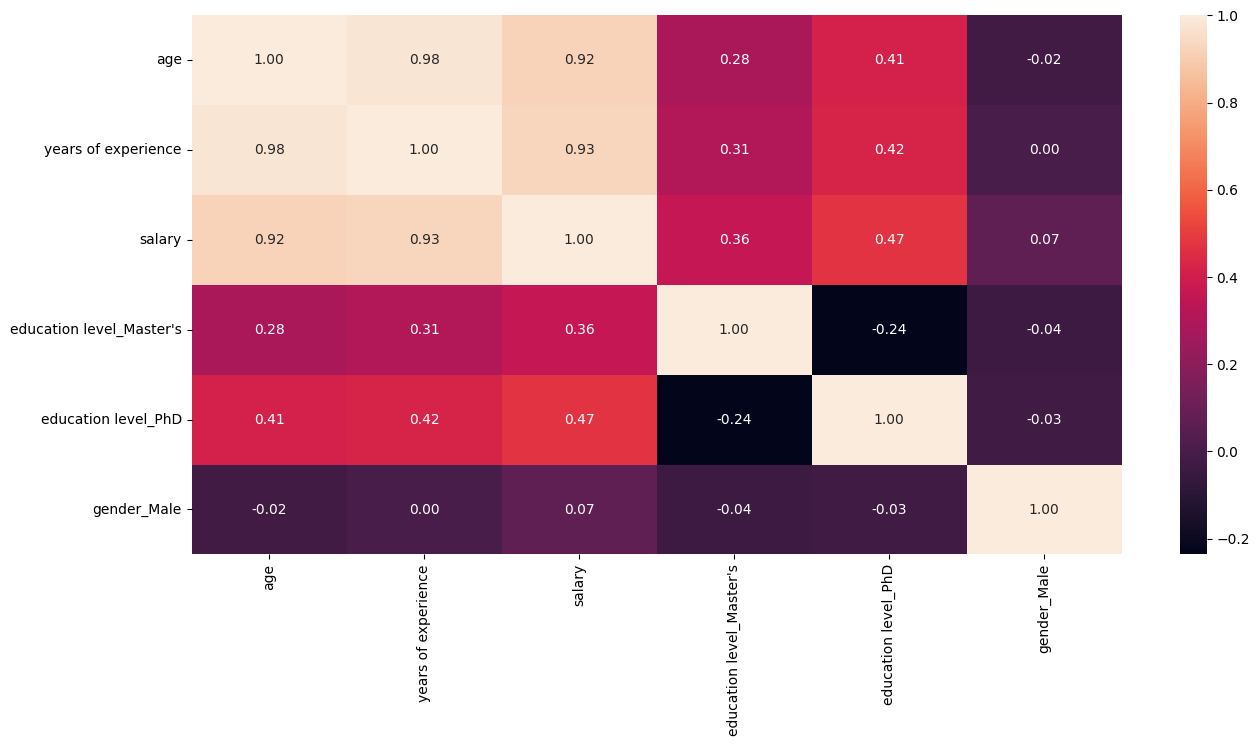

In [76]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

# Describing Dataset

In [77]:
data.describe()

,age,years of experience,salary,education level_Master's,education level_PhD,gender_Male
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,37.431635,10.030831,100577.345845,0.261333,0.136000,0.522667
std,7.050146,6.539452,48110.856588,0.439948,0.343247,0.500153
min,23.000000,0.000000,350.000000,0.000000,0.000000,0.000000
25%,31.500000,4.000000,55000.000000,0.000000,0.000000,0.000000
50%,36.000000,9.000000,95000.000000,0.000000,0.000000,1.000000
75%,44.000000,15.000000,140000.000000,1.000000,0.000000,1.000000
max,53.000000,25.000000,250000.000000,1.000000,1.000000,1.000000


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       375 non-null    float64
 1   years of experience       375 non-null    float64
 2   salary                    375 non-null    float64
 3   education level_Master's  375 non-null    uint8  
 4   education level_PhD       375 non-null    uint8  
 5   gender_Male               375 non-null    uint8  
dtypes: float64(3), uint8(3)
memory usage: 10.0 KB


# Checking Outliers

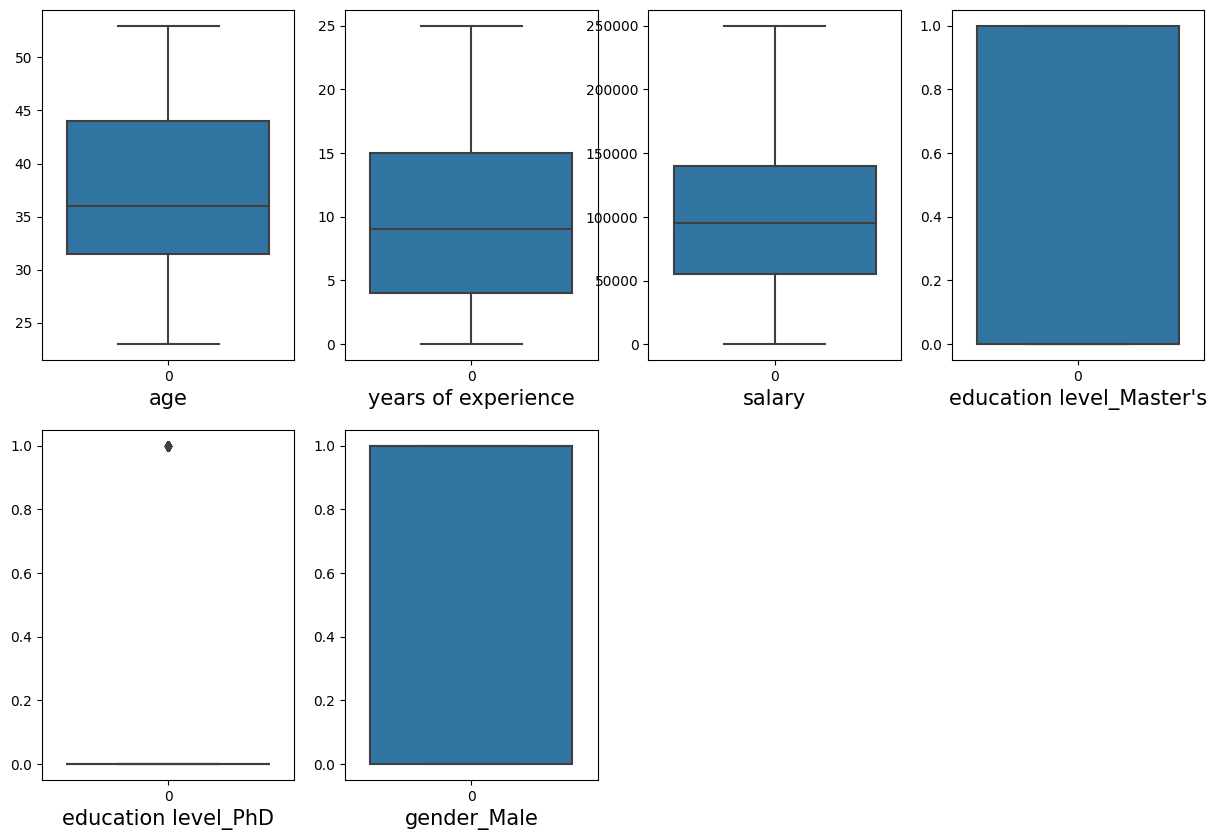

In [79]:
plt.figure(figsize=(15,10))
graph = 1

for column in data:
    if graph<=8:
        plt.subplot(2,4,graph)
        ax = sns.boxplot(data = data[column])
        plt.xlabel(column,fontsize=15)
    graph +=1
plt.show()

eduaction level_PhD have very less outliers but is categorical feature so,we are
not removing outliers.

In [80]:
data.skew()

age                         0.198047
years of experience         0.362179
salary                      0.401642
education level_Master's    1.090794
education level_PhD         2.132297
gender_Male                -0.091125
dtype: float64

In [81]:
from scipy.stats import zscore

z_score = zscore(data[['salary']])   # Considering salary
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = data[filtering_entry]

df.describe()

,age,years of experience,salary,education level_Master's,education level_PhD,gender_Male
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,37.358883,9.953248,99776.151988,0.262735,0.134048,0.520107
std,6.997951,6.470038,46972.512521,0.440711,0.341162,0.500267
min,23.000000,0.000000,350.000000,0.000000,0.000000,0.000000
25%,31.000000,4.000000,55000.000000,0.000000,0.000000,0.000000
50%,36.000000,9.000000,95000.000000,0.000000,0.000000,1.000000
75%,44.000000,15.000000,140000.000000,1.000000,0.000000,1.000000
max,53.000000,25.000000,220000.000000,1.000000,1.000000,1.000000


In [82]:
df.shape

(373, 6)

In [83]:
df.head()

,age,years of experience,salary,education level_Master's,education level_PhD,gender_Male
0,32.0,5.0,90000.0,0,0,1
1,28.0,3.0,65000.0,1,0,0
2,45.0,15.0,150000.0,0,1,1
3,36.0,7.0,60000.0,0,0,0
4,52.0,20.0,200000.0,1,0,1


# Percentage loss of data

In [85]:
data_loss = ((375 - 373)/375)*100
data_loss

0.5333333333333333

# Separating columns into features and label

In [86]:
# Independent column
x = df.drop(['salary'],axis=1)
x

,age,years of experience,education level_Master's,education level_PhD,gender_Male
0,32.0,5.0,0,0,1
1,28.0,3.0,1,0,0
2,45.0,15.0,0,1,1
3,36.0,7.0,0,0,0
4,52.0,20.0,1,0,1
...,...,...,...,...,...
370,35.0,8.0,0,0,0
371,43.0,19.0,1,0,1
372,29.0,2.0,0,0,0
373,34.0,7.0,0,0,1


In [87]:
# Target
y = df['salary']
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: salary, Length: 373, dtype: float64

In [88]:

from sklearn.preprocessing import power_transform

In [89]:
x = power_transform(x,method='yeo-johnson')

In [90]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.73816152, -0.66397218, -0.59696201, -0.39344474,  0.96056255],
       [-1.41193305, -1.12081562,  1.67514849, -0.39344474, -1.04105662],
       [ 1.08461345,  0.83594902, -0.59696201,  2.54165301,  0.96056255],
       ...,
       [-1.23701066, -1.39972547, -0.59696201, -0.39344474, -1.04105662],
       [-0.42490901, -0.28775473, -0.59696201, -0.39344474,  0.96056255],
       [ 0.95981638,  0.83594902, -0.59696201,  2.54165301, -1.04105662]])

# LinearRegression

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [92]:
lr = LinearRegression()

# Finding Best Random state

In [93]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)

    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9403109800997205 on Random State 872


In [94]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=253)

In [95]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Random Forest' : RandomForestRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    'XG Boost Regressor' : XGBRegressor()
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)

                         ]

In [96]:
results

,MAE,MSE,RMSE,R2-score
Linear Regression,11720.630,2.408682e+08,15519.928870,0.901
Random Forest,10865.731,2.468722e+08,15712.166994,0.899
Gradient Boost Regressor,10495.859,2.160192e+08,14697.592699,0.911
XG Boost Regressor,11078.238,2.671167e+08,16343.705056,0.891


In [97]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Oranges',subset=['R2-score'])

,MAE,MSE,RMSE,R2-score
Gradient Boost Regressor,10495.859000,216019231.155000,14697.592699,0.911000
Linear Regression,11720.630000,240868192.140000,15519.928870,0.901000
Random Forest,10865.731000,246872191.633000,15712.166994,0.899000
XG Boost Regressor,11078.238000,267116694.967000,16343.705056,0.891000


In [98]:
y_pred = lr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [99]:
for j in range(4,10):
    isscore = cross_val_score(lr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 87.95213128951508
accuracy_score is:- 90.06916261158821


At cv:- 5
Cross validation score is:- 87.77485854317344
accuracy_score is:- 90.06916261158821


At cv:- 6
Cross validation score is:- 88.11280793273363
accuracy_score is:- 90.06916261158821


At cv:- 7
Cross validation score is:- 88.79311711104329
accuracy_score is:- 90.06916261158821


At cv:- 8
Cross validation score is:- 88.81098427512138
accuracy_score is:- 90.06916261158821


At cv:- 9
Cross validation score is:- 88.93167415716631
accuracy_score is:- 90.06916261158821




In [100]:
lsscore_selected = cross_val_score(lr,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.8881098427512139 
The accuracy score is:  0.9006916261158822


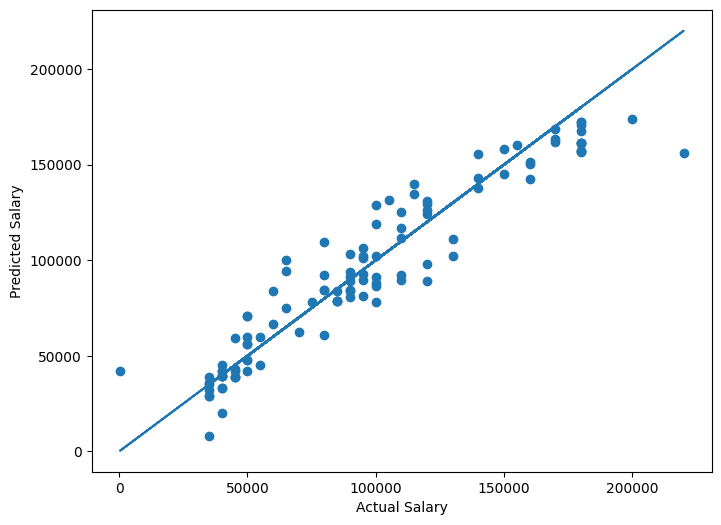

In [101]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred)
plt.plot(y_test,y_test)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

# Regularization

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [103]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1 ,10],
             'random_state':list(range(0,10))}

ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
clf.best_params_

{'alpha': 1, 'random_state': 0}

In [104]:
ls = Lasso(alpha=10,random_state=0)
ls.fit(X_train,y_train)
ls_score_training = ls.score(X_train,y_train)
pred_ls = ls.predict(X_test)
ls_score_training*100

90.72929208506709

In [105]:
pred = r2_score(y_test,pred_ls)

In [106]:
pred*100

90.13187085465712

In [107]:
cv_score = cross_val_score(ls,x,y,cv = 8)
cv_mean = cv_score.mean()
cv_mean*100

88.81095473256842

# Ensemble technique

In [108]:
#RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
gbtr = GradientBoostingRegressor()
gbtr.fit(X_train,y_train)

GradientBoostingRegressor()

In [113]:
y_pred = gbtr.predict(X_test)
print(r2_score(y_test,y_pred))

0.9111108057031957


In [114]:
# Hyperparameter tuning
parameters = {'learning_rate':[0.01,0.1,0.2,0.3,0.4],
             'min_samples_split':[2,4,6,8,10],
             'min_samples_leaf':[1,3,4,5,6,7],
             'max_depth':[5,10,15],
             }

In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
rt = RandomizedSearchCV(gbtr,param_distributions=parameters)

In [117]:
rt.fit(X_train,y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3,
                                                          0.4],
                                        'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [1, 3, 4, 5, 6, 7],
                                        'min_samples_split': [2, 4, 6, 8, 10]})

In [118]:
rt.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_depth': 15,
 'learning_rate': 0.1}

In [119]:
gbtr = GradientBoostingRegressor(min_samples_split=10,min_samples_leaf=4,max_depth=5,learning_rate=0.02)
gbtr.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=5, min_samples_leaf=4,
                          min_samples_split=10)

In [120]:
y_pred = gbtr.predict(X_test)
print(r2_score(y_test,y_pred))

0.8796948684804137


# Conclusion

By using LinearRegressor, we are getting model accuracy as 90% which show our model is performing good.